# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Reading The Data


In [2]:
df=pd.read_csv(r"D:\Download\train.csv")

In [3]:
df1=pd.read_csv(r"D:\Download\test.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [6]:
# shape of the  train dataset
df.shape

(1168, 81)

In [7]:
df['Id'].nunique()

1168

In [8]:
df1['Id'].nunique()

292

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
missing_values=[x for x in df.columns if df[x].isnull().sum()>1]
print('Number of missing variable columns:', len(missing_values))
print("Missing values in the dataset : \n ", missing_values)
print("-"*125)
df[missing_values].head()

Number of missing variable columns: 18
Missing values in the dataset : 
  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
-----------------------------------------------------------------------------------------------------------------------------


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,NaN,None,0.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,NaN,NaN
1,95.0,NaN,None,0.0,TA,Gd,Gd,ALQ,Rec,TA,Attchd,1970.0,Unf,TA,TA,NaN,NaN,NaN
2,92.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,1997.0,Unf,TA,TA,NaN,NaN,NaN
3,105.0,NaN,BrkFace,480.0,Gd,TA,No,BLQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,MnPrv,NaN
4,NaN,NaN,Stone,126.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,Fin,TA,TA,NaN,NaN,NaN


In [13]:
for feature in missing_values:
    print(feature, np.round(df[feature].isnull().mean()*100,4), "% Missing Values")

LotFrontage 18.3219 % Missing Values
Alley 93.4075 % Missing Values
MasVnrType 0.5993 % Missing Values
MasVnrArea 0.5993 % Missing Values
BsmtQual 2.5685 % Missing Values
BsmtCond 2.5685 % Missing Values
BsmtExposure 2.6541 % Missing Values
BsmtFinType1 2.5685 % Missing Values
BsmtFinType2 2.6541 % Missing Values
FireplaceQu 47.1747 % Missing Values
GarageType 5.4795 % Missing Values
GarageYrBlt 5.4795 % Missing Values
GarageFinish 5.4795 % Missing Values
GarageQual 5.4795 % Missing Values
GarageCond 5.4795 % Missing Values
PoolQC 99.4007 % Missing Values
Fence 79.7089 % Missing Values
MiscFeature 96.2329 % Missing Values


# Representation of missing values vs salesprice

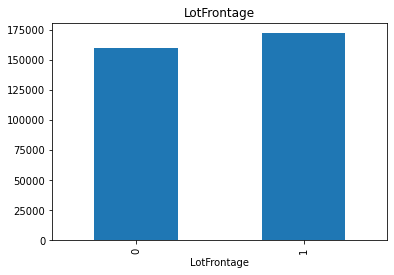

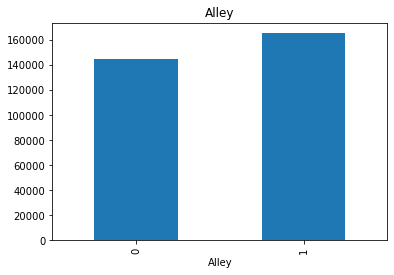

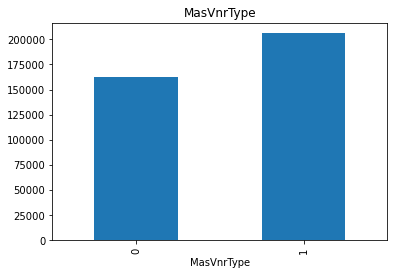

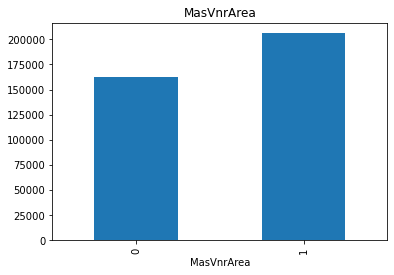

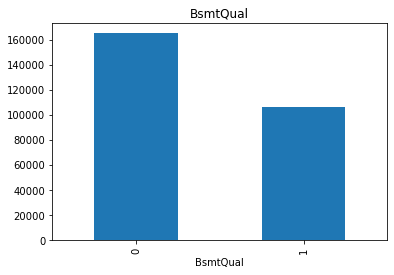

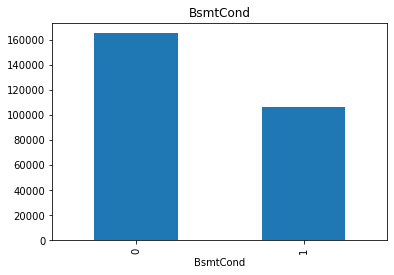

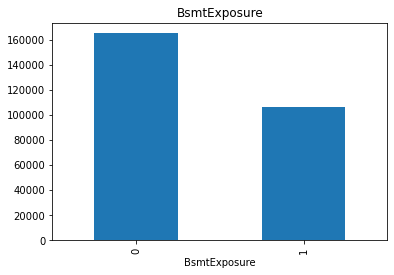

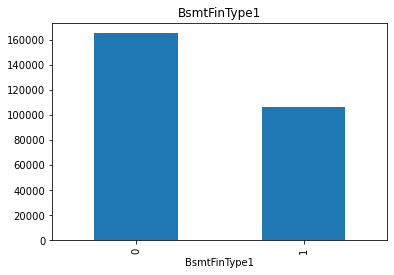

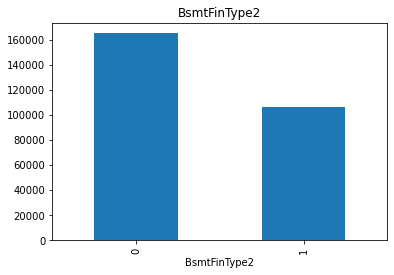

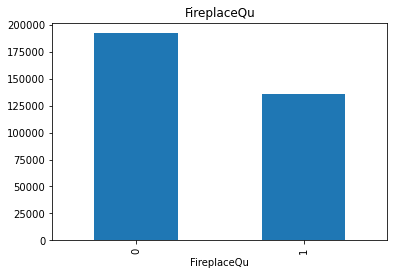

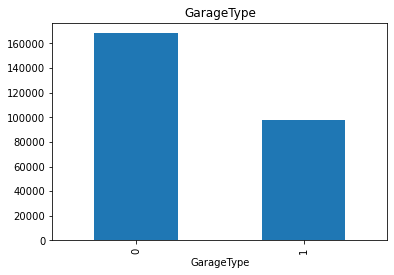

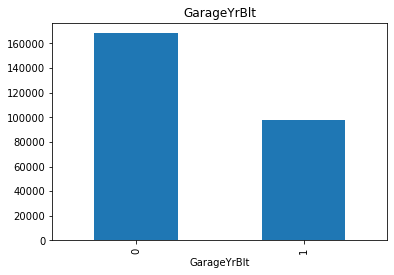

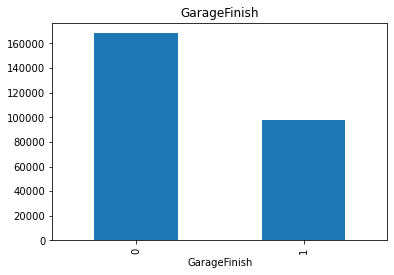

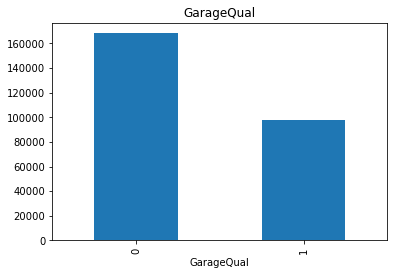

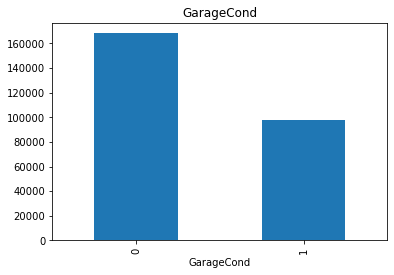

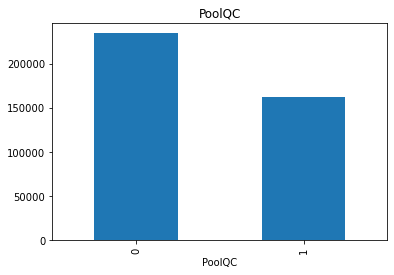

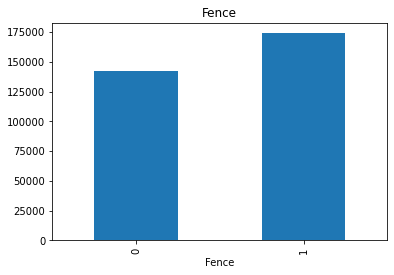

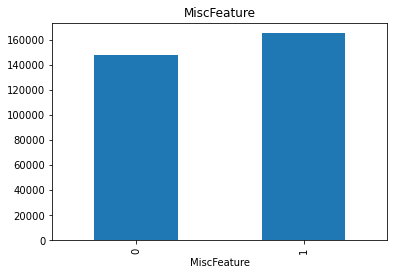

In [14]:
for feature in missing_values:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

In [15]:
numerical_features=[x for x in df.columns if df[x].dtypes != "O"]
print("The number of the numerical columns in the dataset:", len(numerical_features))
print("Numerical columns in the dataset:\n", numerical_features)
print("-"*125)
df[numerical_features].head()

The number of the numerical columns in the dataset: 38
Numerical columns in the dataset:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
-----------------------------------------------------------------------------------------------------------------------------


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000


In [16]:
year_feature=[x for x in df.columns if 'Yr' in x or 'Year' in x]
print("The number of Year column in the dataset :",len(year_feature))
print("Year columns in the dataset :\n",year_feature)
print("-"*125)
df[year_feature].head()

The number of Year column in the dataset : 4
Year columns in the dataset :
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
-----------------------------------------------------------------------------------------------------------------------------


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1976,1976,1977.0,2007
1,1970,1970,1970.0,2007
2,1996,1997,1997.0,2007
3,1977,1977,1977.0,2010
4,1977,2000,1977.0,2009


In [17]:
for feature in year_feature:
    print("The unique items in the colunmn", feature, ":\n", df[feature].unique())

The unique items in the colunmn YearBuilt :
 [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
The unique items in the colunmn YearRemodAdd :
 [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
The unique items in the colunmn Garag

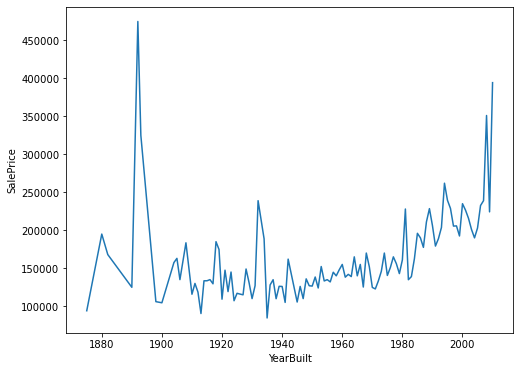

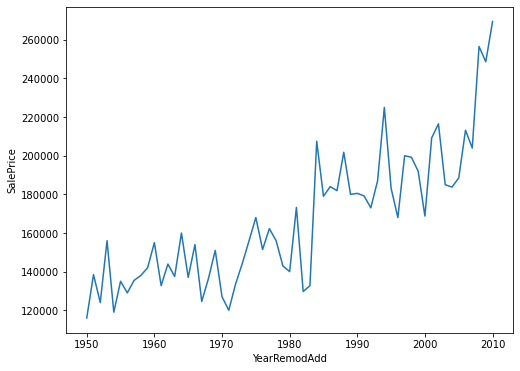

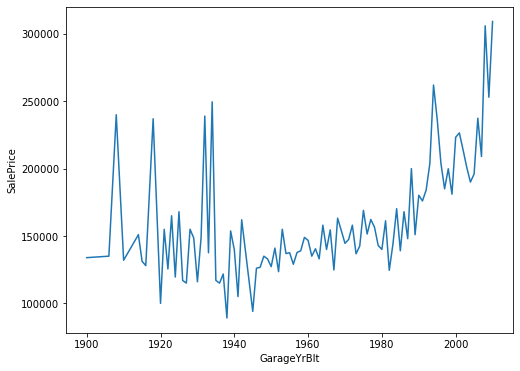

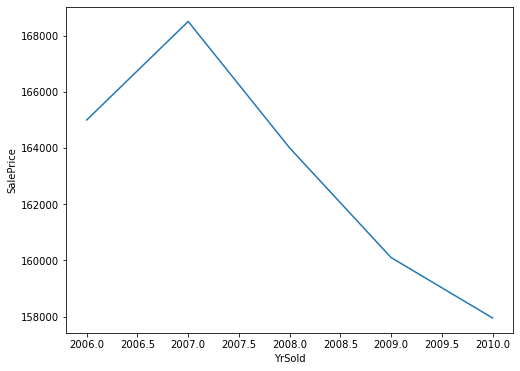

In [18]:
for feature in year_feature:
    plt.figure(figsize=(8,6))
    df.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [19]:
# Extracting discrete and continous variable from the numerical columns


In [20]:
discrete_feature=[x for x in numerical_features if len(df[x].unique())<25 and x not in year_feature+['Id']]
print("The number of discrete column in the dataset:", len(discrete_feature))
print("Discrete columns in the datset: \n", discrete_feature)
print("-"*125)
df[discrete_feature].head()

The number of discrete column in the dataset: 17
Discrete columns in the datset: 
 ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
-----------------------------------------------------------------------------------------------------------------------------


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


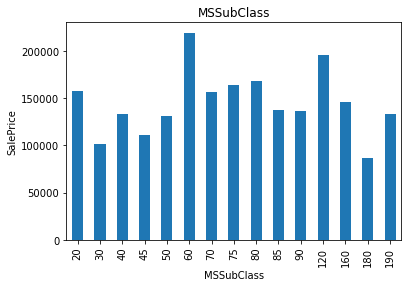

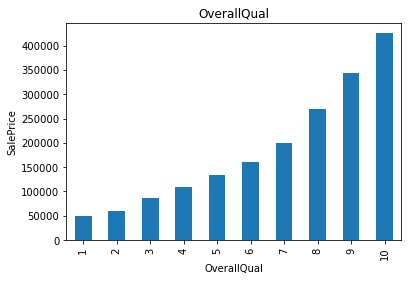

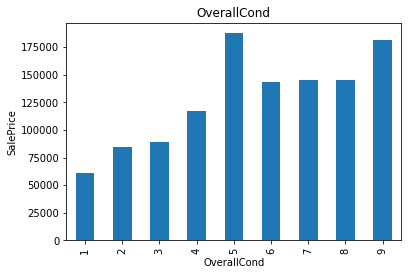

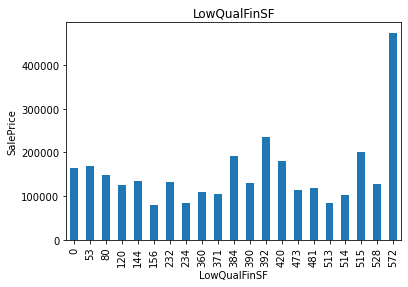

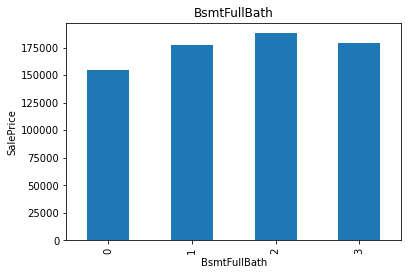

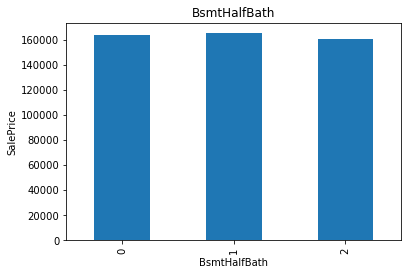

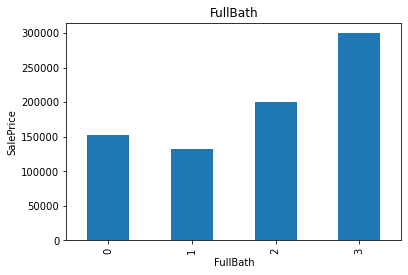

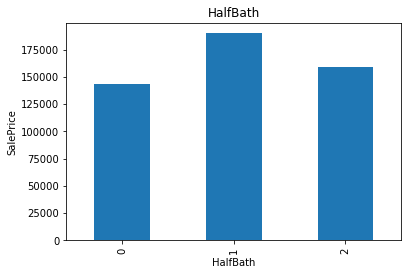

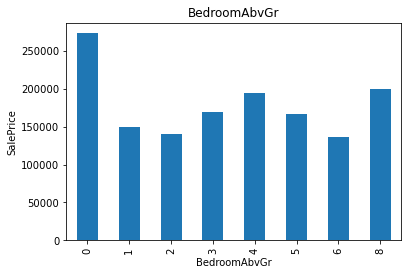

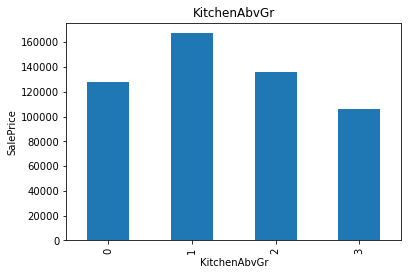

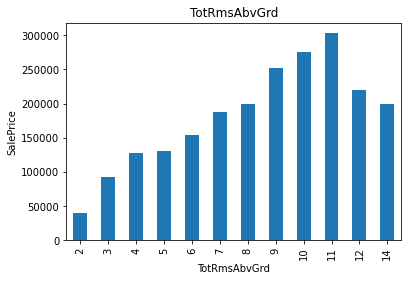

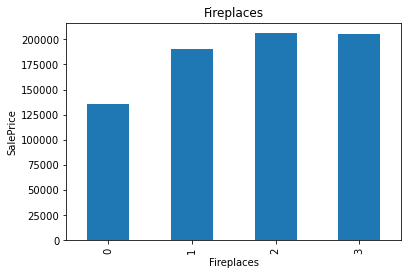

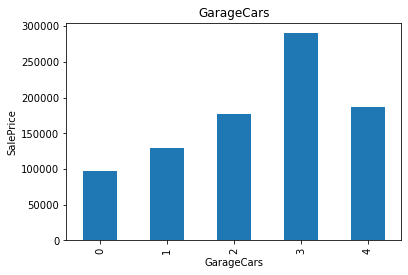

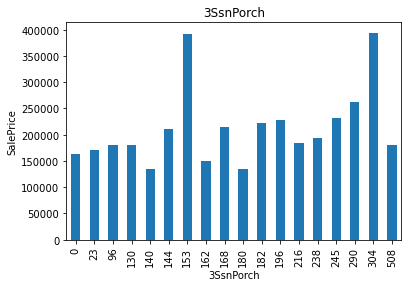

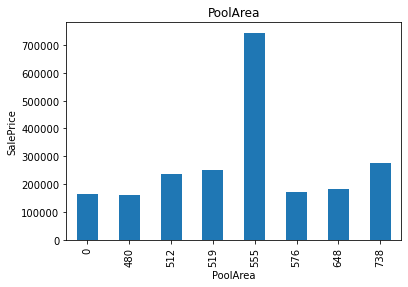

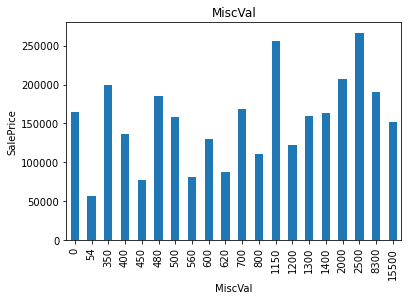

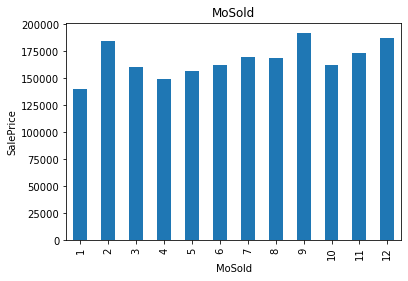

In [21]:
for feature in discrete_feature:
    data=df.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [22]:
# Extracting Continous variable

In [23]:
continous_feature=[x for x in numerical_features if x not in discrete_feature+year_feature+['Id']]
print("The number of continous feature column in the dataset :",len(continous_feature))
print("Continous feature columns in the dataset :\n",continous_feature)
print("-"*125)
df[continous_feature].head()

The number of continous feature column in the dataset : 16
Continous feature columns in the dataset :
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
-----------------------------------------------------------------------------------------------------------------------------


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,NaN,4928,0.0,120,0,958,1078,958,0,958,440,0,205,0,0,128000
1,95.0,15865,0.0,351,823,1043,2217,2217,0,2217,621,81,207,0,224,268000
2,92.0,9920,0.0,862,0,255,1117,1127,886,2013,455,180,130,0,0,269790
3,105.0,11751,480.0,705,0,1139,1844,1844,0,1844,546,0,122,0,0,190000
4,NaN,16635,126.0,1246,0,356,1602,1602,0,1602,529,240,0,0,0,215000


In [24]:
# Representation of continous numerical features

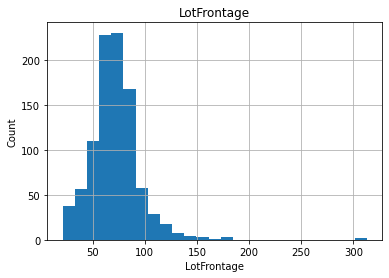

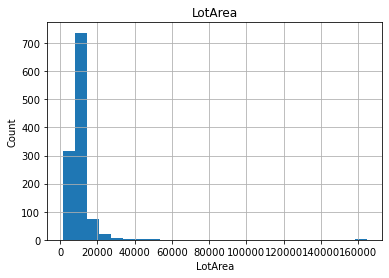

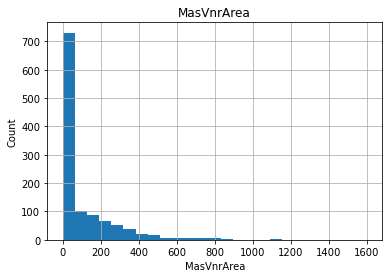

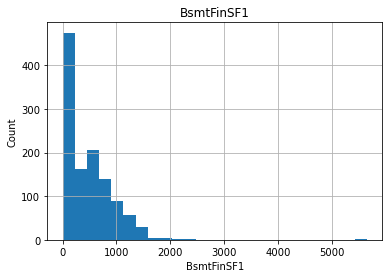

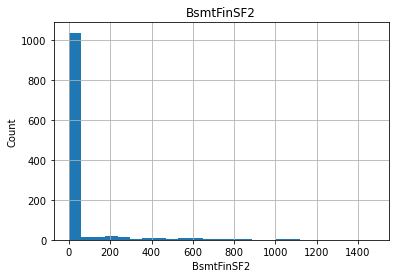

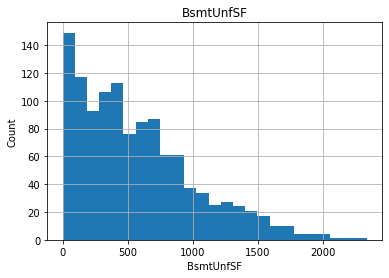

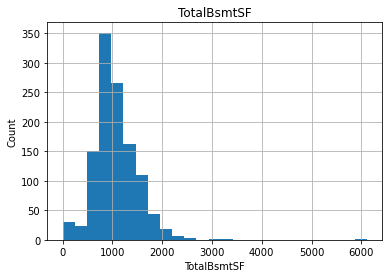

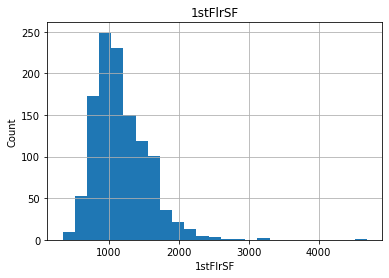

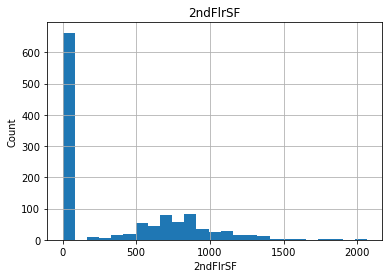

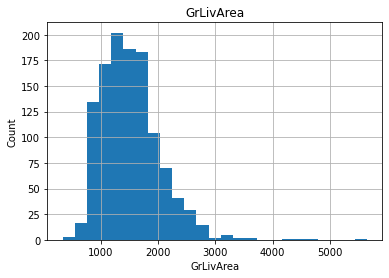

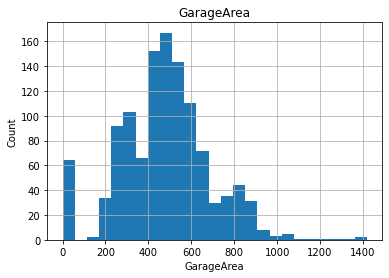

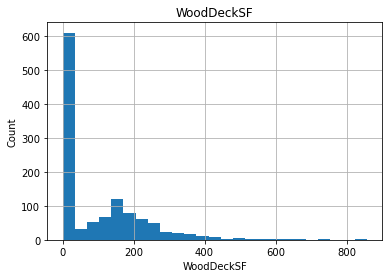

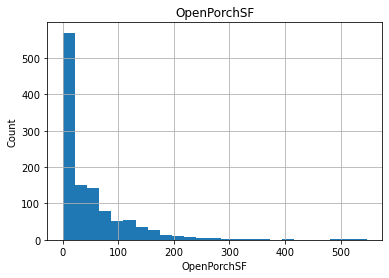

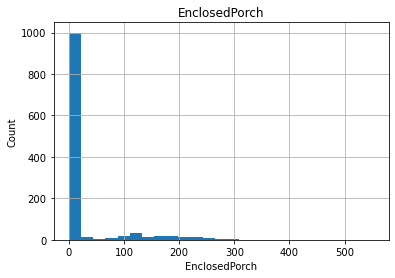

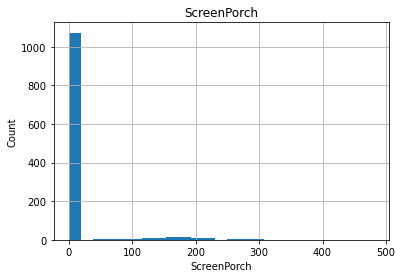

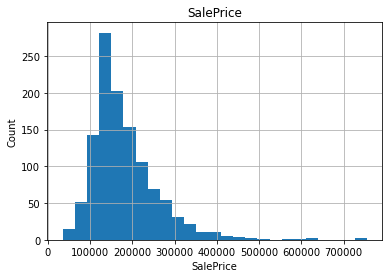

In [25]:
for feature in continous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

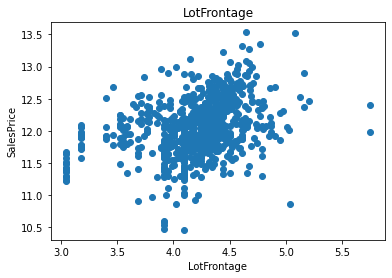

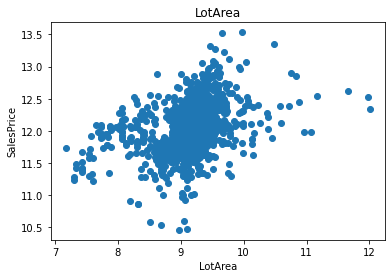

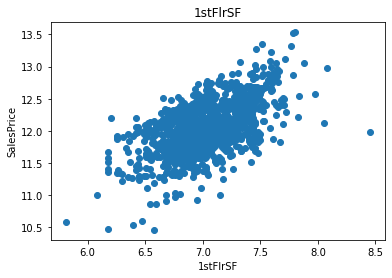

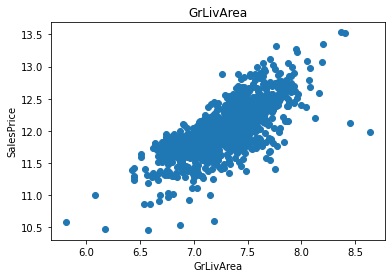

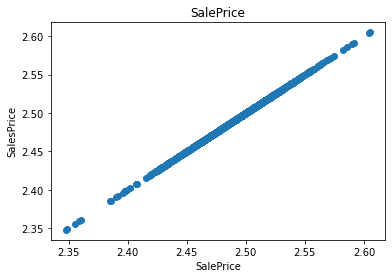

In [26]:
for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

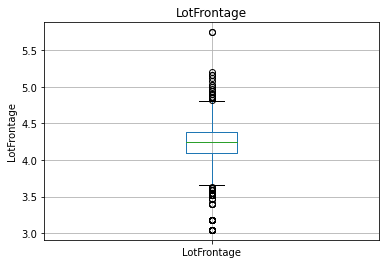

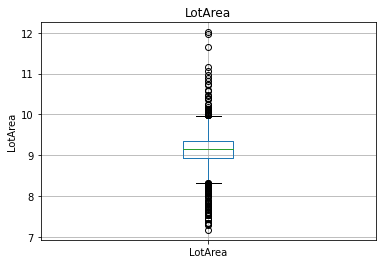

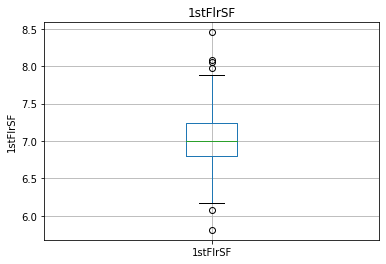

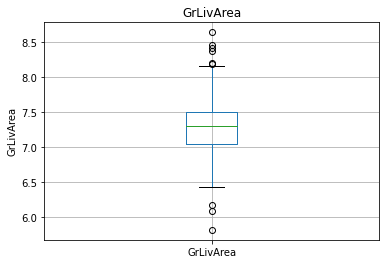

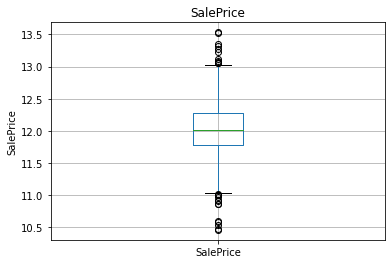

In [27]:
for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [28]:
# there are lot of the outliers and outlier treatment is required

In [29]:
#categorical_features


In [30]:
categorical_features=[x for x in df.columns if df[x].dtypes=='O']
print("The number of categorical column in the dataset :",len(categorical_features))
print("Categorical feature columns in the dataset :\n",categorical_features)
print("-"*125)
df[categorical_features].head()

The number of categorical column in the dataset : 43
Categorical feature columns in the dataset :
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
-----------------------------------------------------------------------------------------------------------------------------


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
#checking the unique items in categorical variables


In [32]:
for feature in categorical_features:
    print("The unique values in the column",feature,":",df[feature].nunique())

The unique values in the column MSZoning : 5
The unique values in the column Street : 2
The unique values in the column Alley : 2
The unique values in the column LotShape : 4
The unique values in the column LandContour : 4
The unique values in the column Utilities : 1
The unique values in the column LotConfig : 5
The unique values in the column LandSlope : 3
The unique values in the column Neighborhood : 25
The unique values in the column Condition1 : 9
The unique values in the column Condition2 : 8
The unique values in the column BldgType : 5
The unique values in the column HouseStyle : 8
The unique values in the column RoofStyle : 6
The unique values in the column RoofMatl : 8
The unique values in the column Exterior1st : 14
The unique values in the column Exterior2nd : 15
The unique values in the column MasVnrType : 4
The unique values in the column ExterQual : 4
The unique values in the column ExterCond : 5
The unique values in the column Foundation : 6
The unique values in the col

In [33]:
#Relationship between categorical column and saleprice

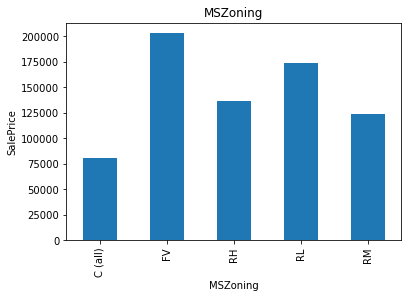

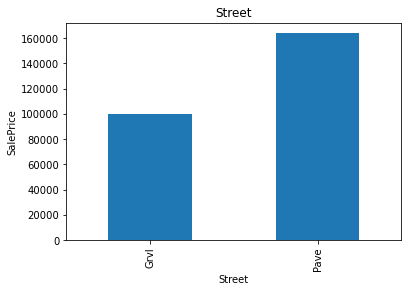

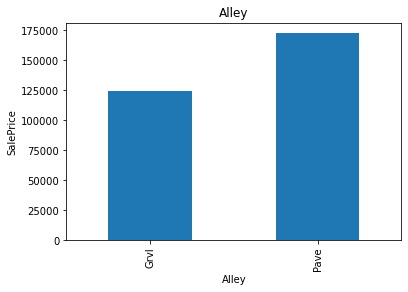

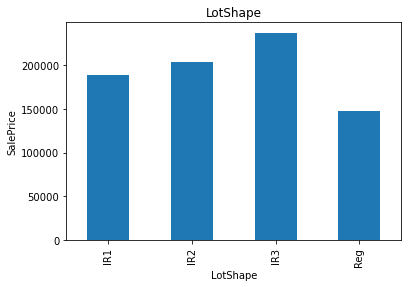

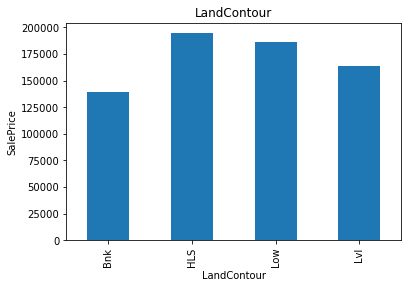

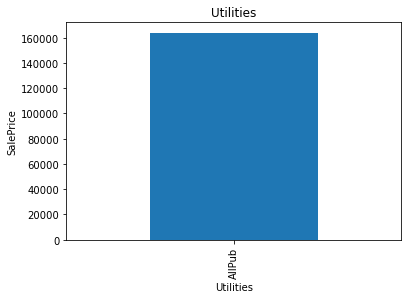

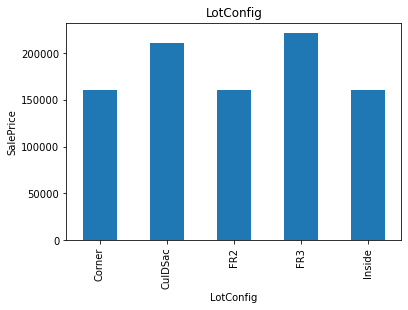

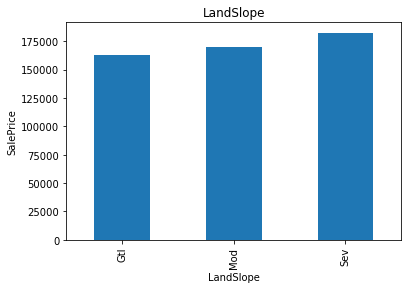

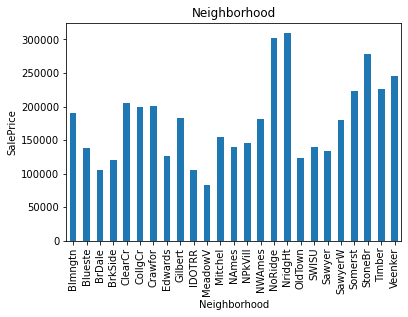

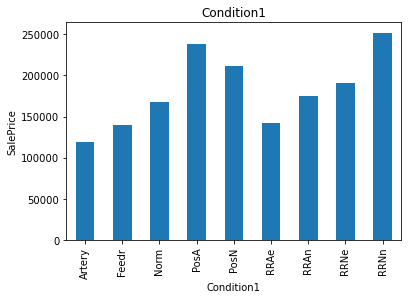

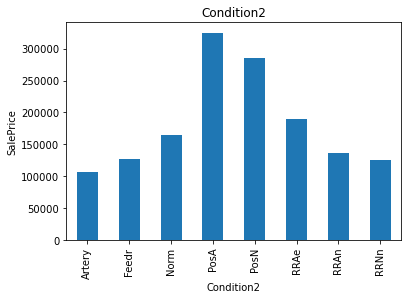

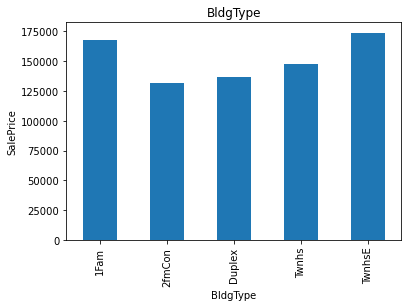

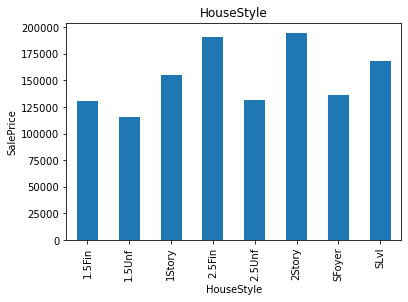

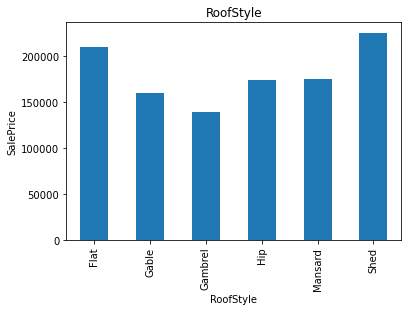

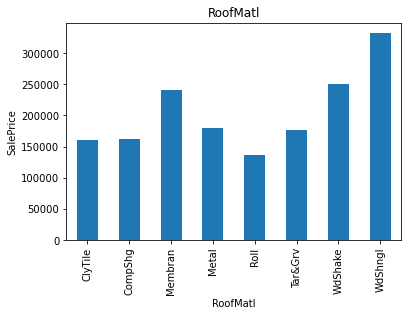

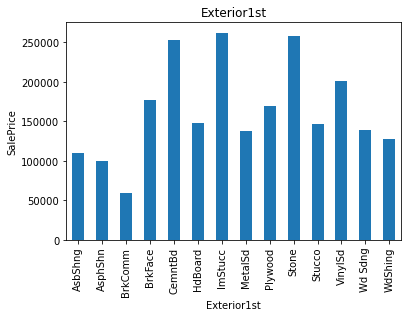

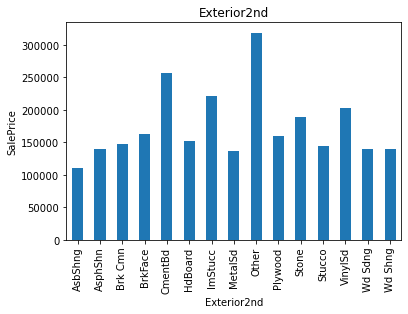

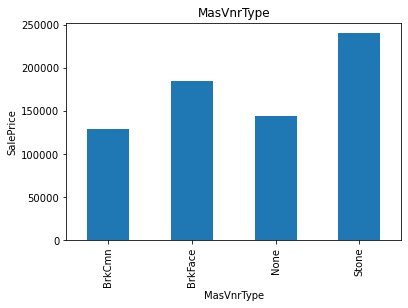

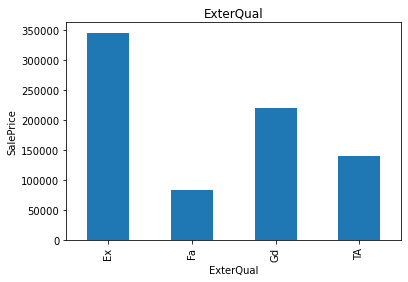

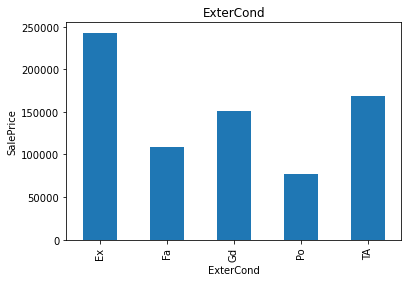

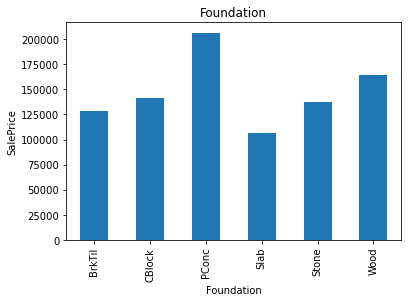

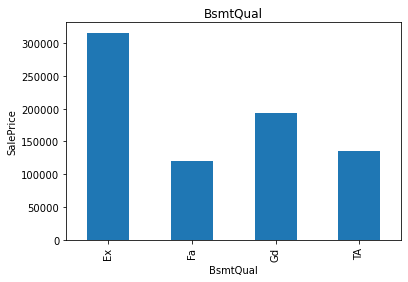

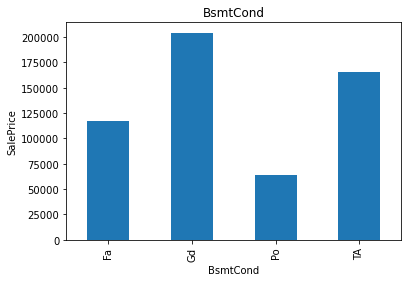

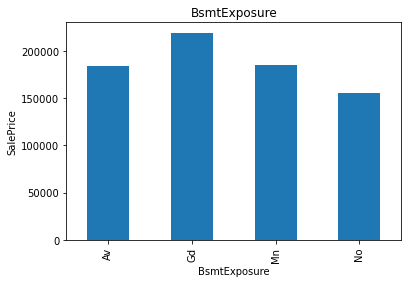

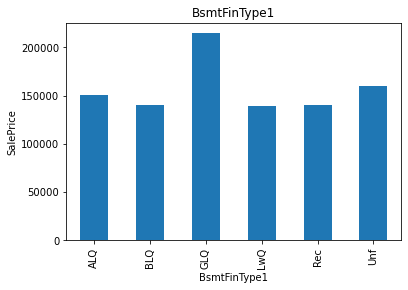

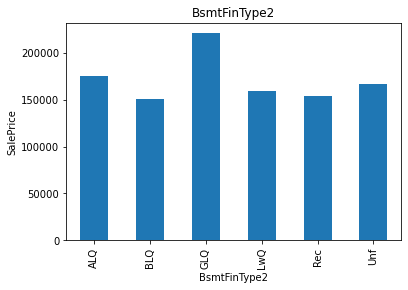

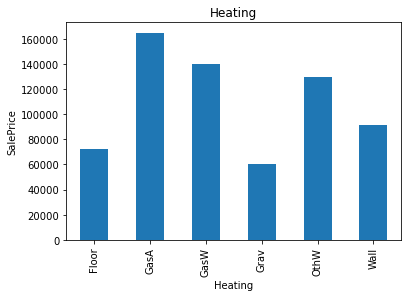

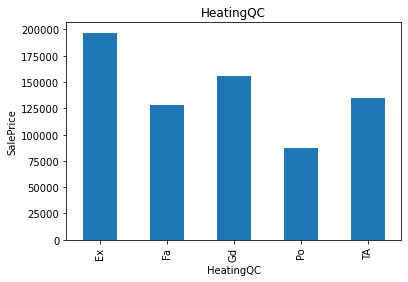

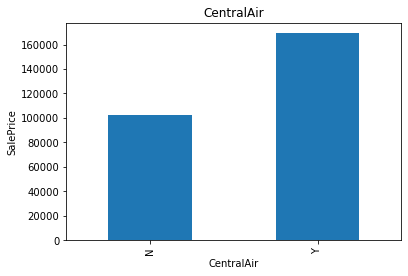

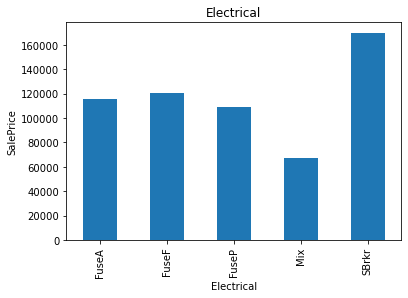

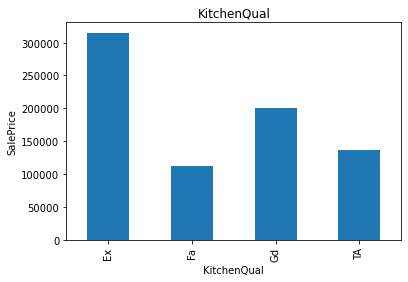

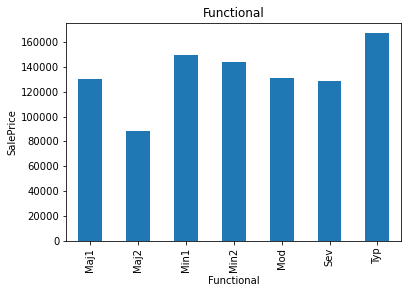

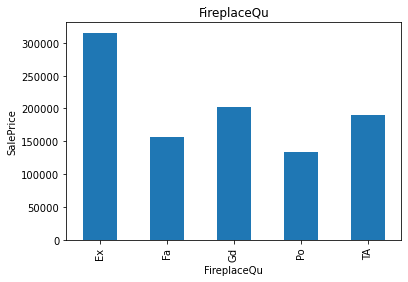

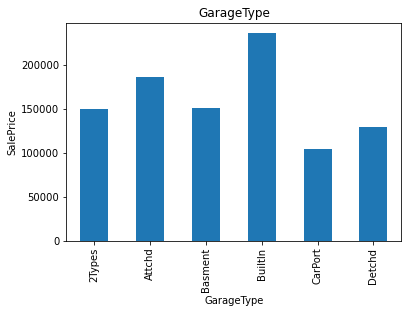

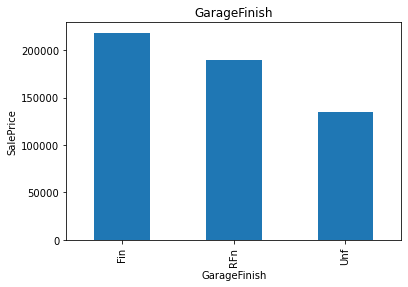

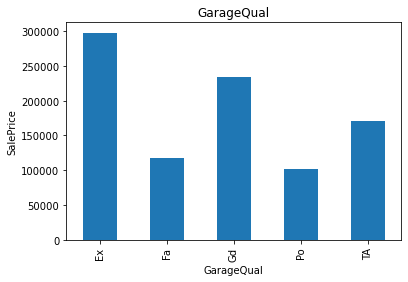

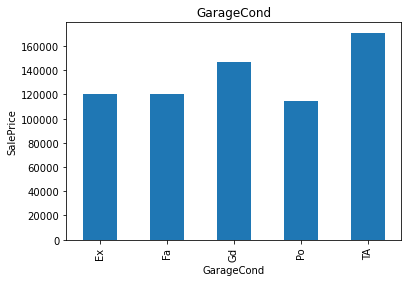

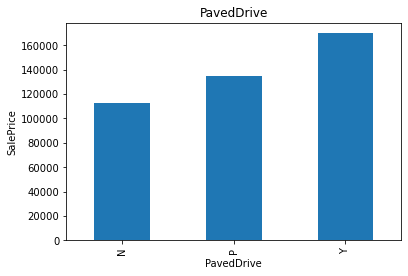

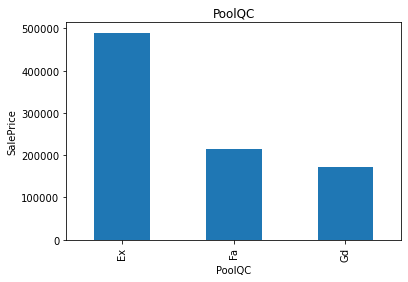

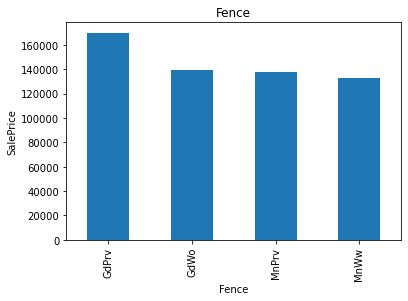

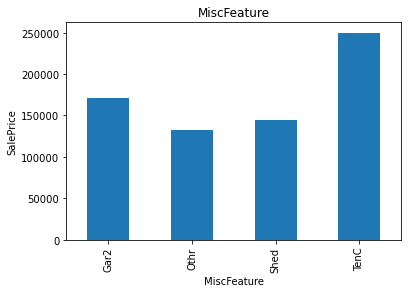

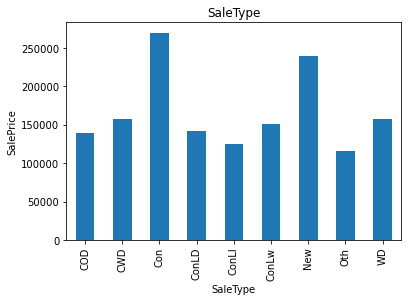

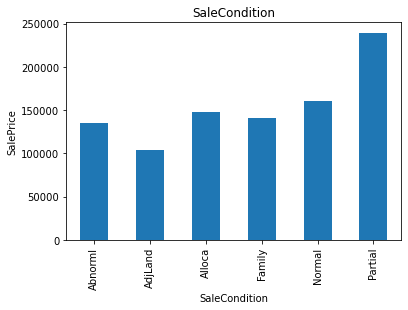

In [34]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [35]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


# EDA for Test Dataset

In [36]:
missing_values_test=[x for x in df1.columns if df1[x].isnull().sum()>1]
print('Number of missing variable columns : ', len(missing_values_test))
print("Missing values in the dataset : \n",missing_values_test)
print("-"*125)
for feature in missing_values:
    print(feature,np.round(df[feature].isnull().mean()*100,4),"% Missing values")
print("-"*125)    
df[missing_values_test].head()

Number of missing variable columns :  16
Missing values in the dataset : 
 ['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
-----------------------------------------------------------------------------------------------------------------------------
LotFrontage 18.3219 % Missing values
Alley 93.4075 % Missing values
MasVnrType 0.5993 % Missing values
MasVnrArea 0.5993 % Missing values
BsmtQual 2.5685 % Missing values
BsmtCond 2.5685 % Missing values
BsmtExposure 2.6541 % Missing values
BsmtFinType1 2.5685 % Missing values
BsmtFinType2 2.6541 % Missing values
FireplaceQu 47.1747 % Missing values
GarageType 5.4795 % Missing values
GarageYrBlt 5.4795 % Missing values
GarageFinish 5.4795 % Missing values
GarageQual 5.4795 % Missing values
GarageCond 5.4795 % Missing values
PoolQC 99.4007 % Missing values
Fence 79.7089 % Mi

,LotFrontage,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,NaN,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,NaN,NaN
1,95.0,NaN,TA,Gd,Gd,ALQ,Rec,TA,Attchd,1970.0,Unf,TA,TA,NaN,NaN,NaN
2,92.0,NaN,Gd,TA,Av,GLQ,Unf,TA,Attchd,1997.0,Unf,TA,TA,NaN,NaN,NaN
3,105.0,NaN,Gd,TA,No,BLQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,MnPrv,NaN
4,NaN,NaN,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,Fin,TA,TA,NaN,NaN,NaN


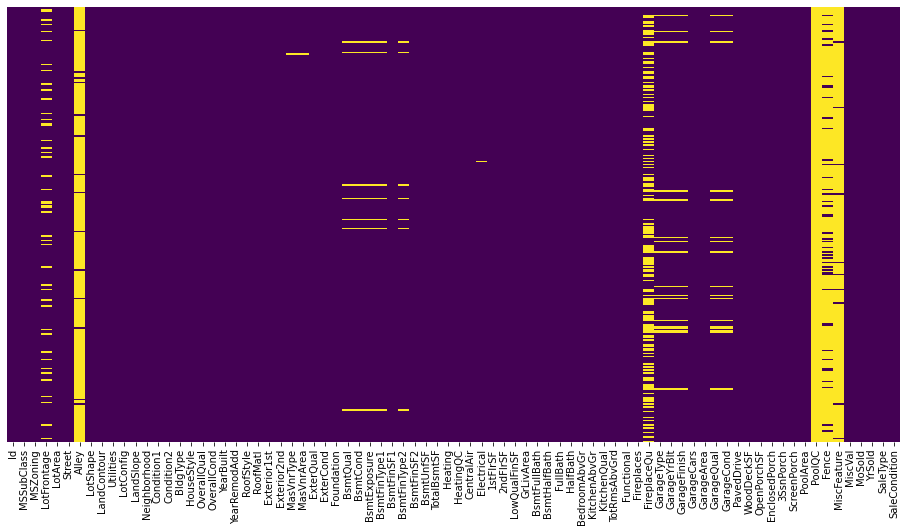

In [37]:
plt.figure(figsize=(16,8))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [38]:
numerical_features_test=[x for x in df1.columns if df1[x].dtypes != "O"]
print("The number of numerical columns in the dataset :",len(numerical_features_test))
print("Numerical columns in the dataset :\n",numerical_features_test)
print("-"*125)
df[numerical_features_test].head()

The number of numerical columns in the dataset : 38
Numerical columns in the dataset :
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold']
-----------------------------------------------------------------------------------------------------------------------------


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,NaN,0,2,2007
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,NaN,0,10,2007
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,NaN,0,6,2007
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,NaN,0,1,2010
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,NaN,0,6,2009


In [39]:
year_feature_test=[x for x in df1.columns if 'Yr' in x or 'Year' in x]
print("The number of Year column in the dataset:", len(year_feature_test))
print("Year columns in the dataset:\n", year_feature_test)
print("-"*125)
df[year_feature_test].head()

The number of Year column in the dataset: 4
Year columns in the dataset:
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
-----------------------------------------------------------------------------------------------------------------------------


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1976,1976,1977.0,2007
1,1970,1970,1970.0,2007
2,1996,1997,1997.0,2007
3,1977,1977,1977.0,2010
4,1977,2000,1977.0,2009


In [40]:
discrete_feature_test=[x for x in numerical_features_test if len(df1[x].unique())<25 and x not in year_feature+['Id']]
print("the number of dicrete column in the dataset:", len(discrete_feature_test))
print("Discrete columns in the dataset : \n ", discrete_feature_test)
print("-"*125)
df[discrete_feature_test].head()

the number of dicrete column in the dataset: 19
Discrete columns in the dataset : 
  ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold']
-----------------------------------------------------------------------------------------------------------------------------


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,NaN,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,224,0,NaN,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,NaN,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,NaN,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,NaN,0,6


In [41]:
continous_feature_test=[x for x in numerical_features_test if x not in discrete_feature_test+year_feature+['Id']]
print("The number of continous feature column in the dataset :", len(continous_feature_test))
print("Continous feature columns in the dataset: \n", continous_feature_test)
print("-"*125)
df[continous_feature_test].head()

The number of continous feature column in the dataset : 14
Continous feature columns in the dataset: 
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']
-----------------------------------------------------------------------------------------------------------------------------


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,NaN,4928,0.0,120,0,958,1078,958,0,958,440,0,205,0
1,95.0,15865,0.0,351,823,1043,2217,2217,0,2217,621,81,207,0
2,92.0,9920,0.0,862,0,255,1117,1127,886,2013,455,180,130,0
3,105.0,11751,480.0,705,0,1139,1844,1844,0,1844,546,0,122,0
4,NaN,16635,126.0,1246,0,356,1602,1602,0,1602,529,240,0,0


In [42]:
categorical_features_test=[x for x in df1.columns if df1[x].dtypes=='O']
print("The number of the categorical column in the dataset:", len(categorical_features_test))
print("Categorical features columns in the dataset:\n", categorical_features_test)
print("-"*125)
df[categorical_features_test].head()

The number of the categorical column in the dataset: 42
Categorical features columns in the dataset:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
-----------------------------------------------------------------------------------------------------------------------------


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,WD,Normal


# Feature Engineering for Train Dataset

In [43]:
# Handling missing values 

In [44]:
## lets handle Categorical features which are missing 
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
for feature in features_nan:
    print("{}:{}% missing values".format(feature, np.round(df[feature].isnull().mean()*100,4)))

Alley:93.4075% missing values
MasVnrType:0.5993% missing values
BsmtQual:2.5685% missing values
BsmtCond:2.5685% missing values
BsmtExposure:2.6541% missing values
BsmtFinType1:2.5685% missing values
BsmtFinType2:2.6541% missing values
FireplaceQu:47.1747% missing values
GarageType:5.4795% missing values
GarageFinish:5.4795% missing values
GarageQual:5.4795% missing values
GarageCond:5.4795% missing values
PoolQC:99.4007% missing values
Fence:79.7089% missing values
MiscFeature:96.2329% missing values


In [45]:
##replace the missing value  with a new label
def replace_cat_feature(df, features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data
df=replace_cat_feature(df, features_nan)
df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [46]:
df.drop('MasVnrArea',axis=1,inplace=True)
df1.drop('MasVnrArea',axis=1,inplace=True)

In [47]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 
                    and df[feature].dtypes!='O']
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean()*100,4)))

LotFrontage: 18.3219% missing value
GarageYrBlt: 5.4795% missing value


In [48]:
for feature in numerical_with_nan:
    median_value=df[feature].median()
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage    0
GarageYrBlt    0
dtype: int64

In [49]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       df[feature]=df['YrSold']-df[feature]

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,GarageYrBltnan
0,127,120,RL,70.0,4928,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,0,2,2007,WD,Normal,128000,1,0
1,889,20,RL,95.0,15865,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,0,10,2007,WD,Normal,268000,0,0
2,793,60,RL,92.0,9920,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,0,6,2007,WD,Normal,269790,0,0
3,110,20,RL,105.0,11751,Pave,Missing,IR1,Lvl,AllPub,...,MnPrv,Missing,0,1,2010,COD,Normal,190000,0,0
4,422,20,RL,70.0,16635,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,0,6,2009,WD,Normal,215000,1,0


In [51]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,31,31,30.0
1,37,37,37.0
2,11,10,10.0
3,33,33,33.0
4,32,9,32.0


In [52]:
# log transformation for skewed data

In [53]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])

In [54]:
df.drop('YrSold',axis=1,inplace=True)


In [55]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,GarageYrBltnan
0,127,120,RL,4.248495,8.502689,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,2,WD,Normal,11.759786,1,0
1,889,20,RL,4.553877,9.671871,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,10,WD,Normal,12.498742,0,0
2,793,60,RL,4.521789,9.202308,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,6,WD,Normal,12.505399,0,0
3,110,20,RL,4.653960,9.371694,Pave,Missing,IR1,Lvl,AllPub,...,Missing,MnPrv,Missing,0,1,COD,Normal,12.154779,0,0
4,422,20,RL,4.248495,9.719264,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,6,WD,Normal,12.278393,1,0


In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [57]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,GarageYrBltnan
0,127,120,RL,4.248495,8.502689,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,2,WD,Normal,11.759786,1,0
1,889,20,RL,4.553877,9.671871,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,10,WD,Normal,12.498742,0,0
2,793,60,RL,4.521789,9.202308,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,6,WD,Normal,12.505399,0,0
3,110,20,RL,4.653960,9.371694,Pave,Missing,IR1,Lvl,AllPub,...,Missing,MnPrv,Missing,0,1,COD,Normal,12.154779,0,0
4,422,20,RL,4.248495,9.719264,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,6,WD,Normal,12.278393,1,0


In [58]:
for feature in categorical_features:
    df[feature]=labelencoder.fit_transform(df[feature])

In [59]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,GarageYrBltnan
0,127,120,3,4.248495,8.502689,1,1,0,3,0,...,3,2,1,0,2,8,4,11.759786,1,0
1,889,20,3,4.553877,9.671871,1,1,0,3,0,...,3,2,1,0,10,8,4,12.498742,0,0
2,793,60,3,4.521789,9.202308,1,1,0,3,0,...,3,2,1,0,6,8,4,12.505399,0,0
3,110,20,3,4.653960,9.371694,1,1,0,3,0,...,3,3,1,0,1,0,4,12.154779,0,0
4,422,20,3,4.248495,9.719264,1,1,0,3,0,...,3,2,1,0,6,8,4,12.278393,1,0
5,1197,60,3,4.060443,9.550662,1,1,0,3,0,...,3,2,1,0,11,6,5,12.297785,0,0
6,561,20,3,4.248495,9.336180,1,1,0,3,0,...,3,2,1,0,5,8,4,11.707670,1,0
7,1041,20,3,4.477337,9.482274,1,1,3,3,0,...,3,0,1,0,1,8,4,11.951180,0,0
8,503,20,3,4.248495,9.123693,1,1,3,3,0,...,3,0,3,400,4,8,4,11.849398,0,0
9,576,50,3,4.382027,9.045466,1,1,3,3,0,...,3,2,1,0,10,0,0,11.682668,0,0


# Feature engineering Test data


In [60]:
## lets handle Categorical features which are missing
features_nan_test=[feature for feature in df1.columns if df1[feature].isnull().sum()>1 and df1[feature].dtypes=='O']

for feature in features_nan_test:
    print("{}: {}% missing values".format(feature,np.round(df1[feature].isnull().mean()*100,4)))

Alley: 95.2055% missing values
BsmtQual: 2.3973% missing values
BsmtCond: 2.3973% missing values
BsmtExposure: 2.3973% missing values
BsmtFinType1: 2.3973% missing values
BsmtFinType2: 2.3973% missing values
FireplaceQu: 47.6027% missing values
GarageType: 5.8219% missing values
GarageFinish: 5.8219% missing values
GarageQual: 5.8219% missing values
GarageCond: 5.8219% missing values
Fence: 84.9315% missing values
MiscFeature: 96.5753% missing values


In [61]:
##replce missing value with new value
def replace_cat_feature_test(df1, features_nan_test):
    data=df1.copy()
    data[features_nan_test]=data[features_nan_test].fillna('Missing')
    return data
df1=replace_cat_feature_test(df1, features_nan_test)
df1[features_nan_test].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
MiscFeature     0
dtype: int64

In [62]:
df.drop('PoolQC',axis=1,inplace=True)
df1.drop('PoolQC',axis=1,inplace=True)

In [63]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan_test=[feature for feature in df1.columns if df1[feature].isnull().sum()>1 
                    and df1[feature].dtypes!='O']
for feature in numerical_with_nan_test:
    print("{}: {}% missing value".format(feature,np.around(df1[feature].isnull().mean()*100,4)))

LotFrontage: 15.411% missing value
GarageYrBlt: 5.8219% missing value


In [64]:
for feature in numerical_with_nan_test:
    median_value=df1[feature].median()
    df1[feature+'nan']=np.where(df1[feature].isnull(),1,0)
    df1[feature].fillna(median_value,inplace=True)
    
df1[numerical_with_nan_test].isnull().sum()

LotFrontage    0
GarageYrBlt    0
dtype: int64

In [65]:
## Date Time Variables

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       df1[feature]=df1['YrSold']-df1[feature]

In [66]:
num_features_test=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features_test:
    df1[feature]=np.log(df1[feature])

In [67]:
df1.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,GarageYrBltnan
0,337,20,RL,4.454347,9.557964,Pave,Missing,IR1,HLS,AllPub,...,0,Missing,Missing,0,7,2007,WD,Normal,0,0
1,1018,120,RL,4.174387,8.668024,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,0,8,2009,COD,Abnorml,1,0
2,929,20,RL,4.174387,9.379070,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,0,6,2009,WD,Normal,1,0
3,1148,70,RL,4.317488,9.392662,Pave,Missing,Reg,Bnk,AllPub,...,0,Missing,Missing,0,7,2009,WD,Normal,0,0
4,1227,60,RL,4.454347,9.588640,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,0,1,2008,WD,Normal,0,0
5,650,180,RM,3.044522,7.568379,Pave,Missing,Reg,Lvl,AllPub,...,0,MnPrv,Missing,0,12,2007,WD,Normal,0,1
6,1453,180,RM,3.555348,8.209308,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,0,5,2006,WD,Normal,0,0
7,152,20,RL,4.672829,9.538996,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,0,1,2008,New,Partial,0,0
8,427,80,RL,4.174387,9.457200,Pave,Missing,Reg,Low,AllPub,...,0,Missing,Missing,0,8,2009,WD,Normal,1,0
9,776,120,RM,3.465736,8.411833,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,0,6,2009,WD,Normal,0,0


In [68]:
for feature in categorical_features_test:
    df1[feature]=labelencoder.fit_transform(df1[feature])

In [69]:
df1.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,GarageYrBltnan
0,337,20,2,4.454347,9.557964,1,1,0,1,0,...,0,2,0,0,7,2007,5,2,0,0
1,1018,120,2,4.174387,8.668024,1,1,0,3,0,...,0,2,0,0,8,2009,0,0,1,0
2,929,20,2,4.174387,9.379070,1,1,3,3,0,...,0,2,0,0,6,2009,5,2,1,0
3,1148,70,2,4.317488,9.392662,1,1,3,0,0,...,0,2,0,0,7,2009,5,2,0,0
4,1227,60,2,4.454347,9.588640,1,1,0,3,0,...,0,2,0,0,1,2008,5,2,0,0
5,650,180,3,3.044522,7.568379,1,1,3,3,0,...,0,3,0,0,12,2007,5,2,0,1
6,1453,180,3,3.555348,8.209308,1,1,3,3,0,...,0,2,0,0,5,2006,5,2,0,0
7,152,20,2,4.672829,9.538996,1,1,3,3,0,...,0,2,0,0,1,2008,4,3,0,0
8,427,80,2,4.174387,9.457200,1,1,3,2,0,...,0,2,0,0,8,2009,5,2,1,0
9,776,120,3,3.465736,8.411833,1,1,3,3,0,...,0,2,0,0,6,2009,5,2,0,0


# Feature Scaling


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [71]:
y_train=df[['SalePrice']]
x=df.drop(['Id', 'SalePrice'], axis=1)

In [76]:
x_train=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [78]:
x_test=pd.DataFrame(scaler.transform(df1),columns=df1.columns)

In [79]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontagenan,GarageYrBltnan
0,0.588235,0.75,0.445638,0.275238,1.0,0.5,0.0,1.0,0.0,1.00,...,0.000000,0.0,0.50,0.25,0.0,0.090909,1.0,0.8,1.0,0.0
1,0.000000,0.75,0.558672,0.516729,1.0,0.5,0.0,1.0,0.0,1.00,...,0.466667,0.0,0.50,0.25,0.0,0.818182,1.0,0.8,0.0,0.0
2,0.235294,0.75,0.546795,0.419742,1.0,0.5,0.0,1.0,0.0,0.25,...,0.000000,0.0,0.50,0.25,0.0,0.454545,1.0,0.8,0.0,0.0
3,0.000000,0.75,0.595717,0.454728,1.0,0.5,0.0,1.0,0.0,1.00,...,0.000000,0.0,0.75,0.25,0.0,0.000000,0.0,0.8,0.0,0.0
4,0.000000,0.75,0.445638,0.526518,1.0,0.5,0.0,1.0,0.0,0.50,...,0.000000,0.0,0.50,0.25,0.0,0.454545,1.0,0.8,1.0,0.0


In [80]:
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontagenan,GarageYrBltnan
0,0.000000,0.5,0.521833,0.493202,1.0,0.5,0.0,0.333333,0.0,0.00,...,0.0,0.0,0.5,0.0,0.0,0.545455,0.625,0.4,0.0,0.0
1,0.588235,0.5,0.418208,0.309387,1.0,0.5,0.0,1.000000,0.0,0.25,...,0.0,0.0,0.5,0.0,0.0,0.636364,0.000,0.0,1.0,0.0
2,0.000000,0.5,0.418208,0.456252,1.0,0.5,1.0,1.000000,0.0,1.00,...,0.0,0.0,0.5,0.0,0.0,0.454545,0.625,0.4,1.0,0.0
3,0.294118,0.5,0.471175,0.459059,1.0,0.5,1.0,0.000000,0.0,1.00,...,0.0,0.0,0.5,0.0,0.0,0.545455,0.625,0.4,0.0,0.0
4,0.235294,0.5,0.521833,0.499538,1.0,0.5,0.0,1.000000,0.0,0.25,...,0.0,0.0,0.5,0.0,0.0,0.000000,0.625,0.4,0.0,0.0


In [81]:
x_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

In [82]:
x_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

# Fitting Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.025964088001789905


# Fitting Ridge Regression

In [86]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-0.02219666566601542


# Fitting Lasso regression


In [87]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.020738883947092588


In [88]:
y_train.columns

Index(['SalePrice'], dtype='object')

# Predicting using Lasso and ridge Regession


In [89]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

In [90]:
Lasso=pd.DataFrame(prediction_lasso, columns=y_train.columns)
Ridge=pd.DataFrame(prediction_ridge, columns=y_train.columns)

In [91]:
Lasso

,SalePrice
0,12.653904
1,12.135734
2,12.374814
3,11.979121
4,12.234585
...,...
287,12.359062
288,11.755330
289,11.947997
290,11.986964


In [92]:
Ridge

,SalePrice
0,12.641609
1,12.107514
2,12.369453
3,11.915140
4,12.310797
...,...
287,12.345367
288,11.769347
289,11.911719
290,12.010893


In [93]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y_train) 

RandomForestRegressor(random_state=0)

In [94]:
prediction_random=regressor.predict(x_test)

In [95]:
random=pd.DataFrame(prediction_random, columns=y_train.columns)

In [96]:
random

,SalePrice
0,10.977292
1,10.984830
2,10.980040
3,10.980175
4,10.977494
...,...
287,10.979350
288,10.980175
289,10.978502
290,10.978201


In [97]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x, y_train)

DecisionTreeRegressor(random_state=0)

In [98]:
# predicting a new vZalue
  
# test the output by changing values, like 3750
prediction_decision = regressor.predict(x_test)
  
decision=pd.DataFrame(prediction_decision, columns=y_train.columns)

In [99]:
decision

,SalePrice
0,10.858999
1,10.858999
2,10.858999
3,10.858999
4,10.858999
...,...
287,10.858999
288,10.858999
289,10.858999
290,10.858999


# Lasso Regression Model is considered as the best model among 3 because of less error 0.20 followed by ridge (0.22)